In [29]:
# Load packages
import numpy as np
import pandas as pd
from math import acosh
import matplotlib.pyplot as plt

In [30]:

class LambdaSABR():
    def __init__(self, f, f0, T, alpha, beta, rho, nu, barlambda, rlambda):
        # Parameter assignment
        self.f=f
        self.f0=f0
        self.T=T
        self.alpha=alpha
        self.beta=beta
        self.rho=rho
        self.nu = nu
        self.barlambda=barlambda
        self.rlambda=rlambda

        # Calculations based on the parameters 
        self.b1 = 1-self.beta
        self.B=self.rho/np.sqrt(1-self.rho**2)

        if self.beta == 1:
            self.q=np.log(self.f/self.f0)
        else:
            self.q=(f**(self.b1)-f0**(self.b1))/(self.b1)

        self.a_min=np.sqrt(self.alpha**2 + 2*self.alpha*self.nu*self.rho*self.q + self.nu**2*self.q**2)
        self.a_min_q = self.alpha + self.q * self.rho * self.nu

        self.d=acosh((-self.q*self.nu*self.rho - alpha*rho**2 + self.a_min)/(self.alpha*(1 - self.rho**2)))

        self.f_f0 = self.f**self.b1 - self.f0**self.b1

        if self.beta == 1:
                self.d_a_min = 0
                self.dd_a_min = 0 
        else:
            if self.q > 0:
                self.d_a_min= self.beta * self.f**(self.beta - 1) * (self.alpha + (self.nu * self.rho * self.f_f0) / (self.b1)) + self.nu * self.rho
                self.dd_a_min = (self.beta - 1) * self.beta * self.f**(self.beta - 2) * (self.alpha + (self.nu * self.rho * self.f_f0) / (self.b1)) + (self.beta * self.rho * self.nu)/(self.f)
            else:
                self.cap_1 = np.sqrt(self.alpha**2 + (2*self.alpha * self.nu * self.rho * self.f_f0)/(self.b1) + (self.nu**2 * self.f_f0**2) / (self.b1**2))
                self.cap_2 = self.f**self.beta * (2 * self.alpha * self.nu * self.rho * self.f**(-self.beta) + (2 * self.nu**2 * self.f**(-self.beta) * self.f_f0) / (self.b1))
                self.cap_3 = 2 * np.sqrt(self.alpha**2 + (2 * self.alpha * self.nu * self.rho * self.f_f0) / (self.b1) + (self.nu**2 * self.f_f0**2) / (self.b1**2)) 
                self.d_a_min= self.beta * self.f**(self.beta - 1) * self.cap_1 + (self.cap_2/self.cap_3)

                self.ccap1 = self.f**self.beta * (2 * self.alpha * self.f**(-self.beta) * self.rho * self.nu + (2 * self.f**(-self.beta) * self.f_f0 * self.nu**2)  / (self.b1))**2 
                self.ccap2 = 4 * (self.alpha**2 + (2*self.alpha * self.f_f0 * self.rho * self.nu) / (self.b1) + (self.f_f0**2 * self.nu**2) / (self.b1**2))**(3/2)
                self.ccap31 = (2 * self.beta * self.f**(-1-self.beta)*self.f_f0 * self.nu**2) / (self.b1)
                self.ccap3 = self.f**self.beta * (-2 * self.alpha * self.beta * self.f**(-1 - self.beta) * self.rho * self.nu + 2 * self.f**(-2 * self.beta) * self.nu**2 - self.ccap31)
                self.ccap4 = 2 * np.sqrt(self.alpha**2 + (2* self.alpha * self.f_f0 * self.rho * self.nu) / (self.b1) + (self.f_f0**2 * self.nu**2) / (self.b1**2))
                self.ccap51 = (2 * self.f**(-self.beta)* self.f_f0 * self.nu**2) / (self.b1)  
                self.ccap5 = self.beta * self.f**(-1 + self.beta) * (2 * self.alpha * self.f**(- self.beta) * self.rho * self.nu + self.ccap51)
                self.ccap6 = np.sqrt(self.alpha**2 + (2* self.alpha * self.f_f0 * self.rho * self.nu) /(self.b1) + (self.f_f0**2 * self.nu**2)/(self.b1**2)) 
                self.ccap71 = np.sqrt(self.alpha**2 + (2 * self.alpha * self.f_f0 * self.rho * self.nu) / (self.b1) + (self.f_f0**2 * self.nu**2) / (self.b1**2))
                self.ccap7 = (self.beta - 1) * self.beta * self.f**(self.beta - 2) * self.ccap71
                self.dd_a_min= -self.ccap1/self.ccap2 + self.ccap3/self.ccap4 + self.ccap5/self.ccap6 + self.ccap7

        self.volp = 1/self.nu * np.log((self.q*self.nu + self.alpha*self.rho + self.a_min)/(self.alpha*(1+self.rho)))

    # Functions definition
    def A(self):
        return (self.f**(1 - self.beta) * self.nu) / ((1 - self.beta) * self.a_min)

    def Aprime(self):
        return (self.f * self.nu * (self.alpha * self.rho + self.nu + self.q) + self.f**self.beta * (self.beta - 1) * self.a_min) / (self.b1 * self.f**self.beta * self.a_min**2 * (self. nu * self.q + self.rho*(self.alpha - self.a_min)))

    def A0(self):
        return -(self.barlambda*np.sqrt(1-self.rho**2)/(self.a_min))

    def A0prime(self):
        return ((self.barlambda*np.sqrt(1-self.rho**2)*(self.alpha*self.rho+self.nu*self.q))
                /(self.a_min)**2*(self.nu * self.q + self.rho*(self.alpha - self.a_min)))

    def C(self,f):
        return f**self.beta

    def F0(self,x,a,b):
        return np.cos(x)/(a+np.cos(x)+b*np.sin(x))

    def F1(self,x,a,b):
        part_1 = (a * np.sin(x) + b) / ((a**2 - b**2 -1)*(a + b* np.sin(x) + np.cos(x)))
        part_2 = (2 * np.arctan(((a-1)*np.tan(x/2)+ b)/(np.sqrt(a**2 - b**2 - 1)))) / (a**2 - b**2 - 1)**(3/2)
        return part_1 - part_2

    def G0(self,x,a):
        return 1 + (a)/(np.sin(x))

    def G1(self,x):
        if np.tan(x/2)>0:
            return np.log(np.tan(x/2))
        else:
            return np.log(-np.tan(x/2))

    def ln_ln_psabr(self):
        part_1 = self.rlambda / self.nu**2 
        part_2 = (self.barlambda * (self.alpha - self.a_min)) / (self.alpha*self.a_min)
        part_3 = np.log(self.a_min / self.alpha)
        part_4 = (self.rho) / (np.sqrt(1- self.rho**2)) * (self.G0(self.theta2(), self.A0()) * self.thetap() - self.G0(self.theta1(), self.A0())*self.thetap() + self.A0prime() * (self.G1(self.theta2()) - self.G1(self.theta1())))        
        return part_1 * (part_2 + part_3 - part_4)

    def ln_psabr(self):
        if self.beta == 1:
            return 0
        else:
            part_1 = - (self.beta * self.rho) / (2 * np.sqrt(1 - self.rho**2)*(1 - self.beta))
            part_2 = self.F0(self.theta2(), self.A(), self.B)*self.thetap() - self.F0(self.theta1(), self.A(), self.B)*self.thetap()
            part_3 = self.Aprime()*(self.F1(self.theta2(), self.A(), self.B) - self.F1(self.theta1(), self.A(), self.B))
            return part_1 * (part_2 - part_3)

    def sigma1(self,f):
        return ((self.a_min*self.C(self.f))**2/24*(1/self.f**2+(2*self.dd_a_min)/(self.a_min*self.C(self.f))-(self.d_a_min/(self.a_min*self.C(self.f)))**2)
        +(self.alpha*self.nu**2*(self.ln_ln_psabr()+self.ln_psabr())*(1-self.rho**2)*(np.sinh(self.d)))/(2*self.d))
    
    def sigma1q(self,f):
        return (((self.a_min_q*self.C(self.f))**2)/24*(1/self.f**2+(2*self.dd_a_min)/(self.a_min_q*self.C(self.f))-(self.d_a_min/(self.a_min_q*self.C(self.f)))**2)
        +(self.alpha*self.nu**2*(self.ln_ln_psabr()+self.ln_psabr())*(1-self.rho**2)*(np.sinh(self.d)))/(2*self.d))

    def theta1(self):
        return np.pi-np.arctan((np.sqrt(1 - self.rho**2)) / (self.rho))
    
    def theta2(self):
        return np.pi-np.arctan((self.alpha * np.sqrt(1-self.rho**2))/(self.alpha * self.rho - self.nu * self.q))

    def thetap(self):
        return (((np.sqrt(1 - self.rho**2))) / (self.nu * self.q + self.rho * (self.alpha - self.a_min)))

    # Function returning the implied volatility
    def imp_sigma(self):
        if self.q > 0:
            return np.log(self.f/self.f0)/self.volp*(1+self.sigma1q((self.f0+self.f)/2)*self.T)
        else:
            return np.log(self.f/self.f0)/self.volp*(1+self.sigma1((self.f0+self.f)/2)*self.T)

In [31]:
# Sensitivity parameters
strikes=[60,70,80,90,95,105,110,120,130,140]
f0=100
alpha=0.2
beta=1
rho=-0.7
nu=0.5
barlambda=0.00
rlambda=0.0
T = 0.5
r=0.0

# Plotting parameters
strikes_chart = [60,70,80,90,95,105,110,120,130,140]

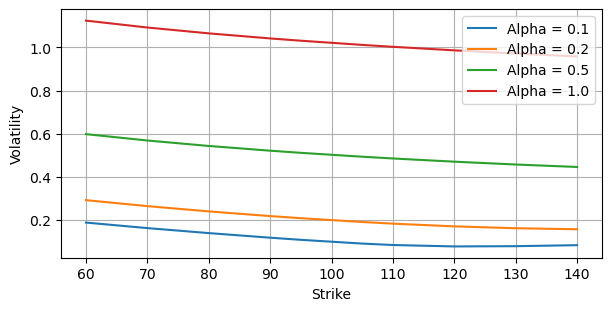

In [32]:
# Sensitivity with respect to alpha
params = [0.1,0.2,0.5,1.0]

impvol_l = pd.DataFrame(0, index=strikes, columns=params)

for strike in strikes:
	for par in params:
		impvol_l.loc[strike, par] =LambdaSABR(f=strike, T=T, f0=f0, alpha=par,beta=beta,nu=nu,rho=rho,barlambda=barlambda,rlambda=0).imp_sigma()	

fig, axs = plt.subplots(1, 1, layout='constrained',figsize=(6, 3))
axs.plot(strikes_chart, impvol_l.iloc[:,0], strikes_chart, impvol_l.iloc[:,1], strikes_chart, impvol_l.iloc[:,2], strikes_chart, impvol_l.iloc[:,3])
axs.set_xlabel('Strike')
axs.set_ylabel('Volatility')
axs.grid(True)
axs.lines[0].set_label('Alpha = 0.1')
axs.lines[1].set_label('Alpha = 0.2')
axs.lines[2].set_label('Alpha = 0.5')
axs.lines[3].set_label('Alpha = 1.0')
axs.legend(loc="upper right")

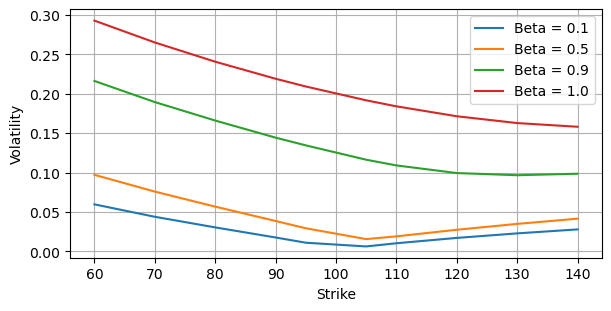

In [33]:
# Sensitivity with respect to beta
params = [0.1,0.5,0.9,1.0]

impvol_l = pd.DataFrame(0, index=strikes, columns=params)

for strike in strikes:
	for par in params:
		impvol_l.loc[strike, par] = LambdaSABR(f=strike, T=T, f0=f0, alpha=alpha,beta=par,nu=nu,rho=rho,barlambda=barlambda,rlambda=0).imp_sigma()	

fig, axs = plt.subplots(1, 1, layout='constrained',figsize=(6, 3))
axs.plot(strikes_chart, impvol_l.iloc[:,0], strikes_chart, impvol_l.iloc[:,1], strikes_chart, impvol_l.iloc[:,2], strikes_chart, impvol_l.iloc[:,3])
axs.set_xlabel('Strike')
axs.set_ylabel('Volatility')
axs.grid(True)
axs.lines[0].set_label('Beta = 0.1')
axs.lines[1].set_label('Beta = 0.5')
axs.lines[2].set_label('Beta = 0.9')
axs.lines[3].set_label('Beta = 1.0')
axs.legend(loc="upper right")

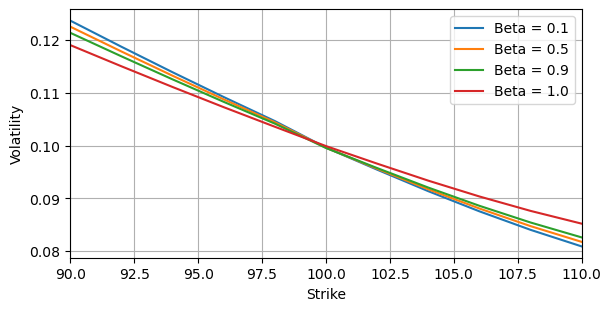

In [35]:
# Sensitivity with respect to beta and alpha(beta)

strikes_ba = [90, 92, 94, 96, 98, 100.05, 102, 104,106, 108, 110]
params = [0.1,0.3,0.5,1.0]
alpha_f_beta = 1 * 100**0.5
alpha_prime = [alpha_f_beta/f0**0.1, alpha_f_beta/f0**0.3, alpha_f_beta/f0**0.5, alpha_f_beta/f0]

impvol_l = pd.DataFrame(0, index=strikes_ba, columns=params)

for strike in strikes_ba:
	for i in range(0,4):
		impvol_l.loc[strike, params[i]] =LambdaSABR(strike, T=T, f0=f0, alpha=alpha_prime[i],beta=params[i],nu=nu,rho=rho,barlambda=barlambda,rlambda=0).imp_sigma()	

strikes_chart_beta_alpha = [90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110]
fig, axs = plt.subplots(1, 1, layout='constrained',figsize=(6, 3))
axs.plot(strikes_chart_beta_alpha, impvol_l.iloc[:,0], strikes_chart_beta_alpha, impvol_l.iloc[:,1], strikes_chart_beta_alpha, impvol_l.iloc[:,2], strikes_chart_beta_alpha, impvol_l.iloc[:,3])
axs.set_xlim(90, 110)
axs.set_xlabel('Strike')
axs.set_ylabel('Volatility')
axs.grid(True)
axs.lines[0].set_label('Beta = 0.1')
axs.lines[1].set_label('Beta = 0.5')
axs.lines[2].set_label('Beta = 0.9')
axs.lines[3].set_label('Beta = 1.0')
axs.legend(loc="upper right")

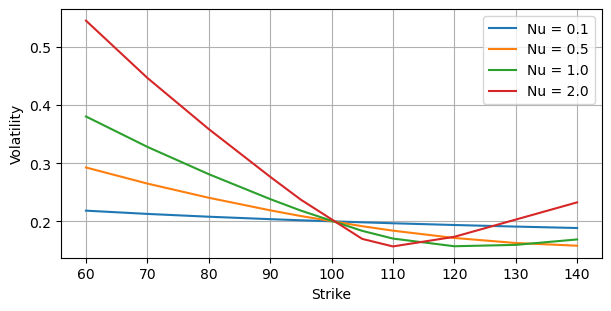

In [ ]:
# Sensitivity with respect to nu
params = [0.1,0.5,1.0,2.0]

impvol_l = pd.DataFrame(0, index=strikes, columns=params)

for strike in strikes:
	for par in params:
		impvol_l.loc[strike, par] =LambdaSABR(strike, T=T, f0=f0, alpha=alpha,beta=beta,nu=par,rho=rho,barlambda=barlambda,rlambda=0).imp_sigma()	

fig, axs = plt.subplots(1, 1, layout='constrained',figsize=(6, 3))
axs.plot(strikes_chart, impvol_l.iloc[:,0], strikes_chart, impvol_l.iloc[:,1], strikes_chart, impvol_l.iloc[:,2], strikes_chart, impvol_l.iloc[:,3])
axs.set_xlabel('Strike')
axs.set_ylabel('Volatility')
axs.grid(True)
axs.lines[0].set_label('Nu = 0.1')
axs.lines[1].set_label('Nu = 0.5')
axs.lines[2].set_label('Nu = 1.0')
axs.lines[3].set_label('Nu = 2.0')
axs.legend(loc="upper right")

C:\Users\tomas\AppData\Local\Temp\ipykernel_14196\1196745778.py:106: RuntimeWarning: divide by zero encountered in scalar divide
  return np.pi-np.arctan((np.sqrt(1 - self.rho**2)) / (self.rho))


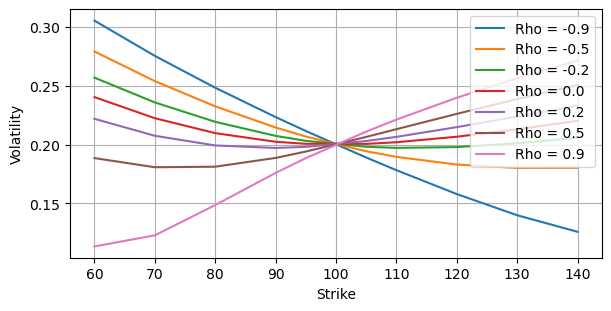

In [ ]:
# Sensitivity with respect to rho
params = [-0.9, -0.5, -0.2, 0.0, 0.2, 0.5, 0.9]

impvol_l = pd.DataFrame(0, index=strikes, columns=params)

for strike in strikes:
	for par in params:
		impvol_l.loc[strike, par] =LambdaSABR(strike, T=T, f0=f0, alpha=alpha,beta=beta,nu=nu,rho=par,barlambda=barlambda,rlambda=0).imp_sigma()	

fig, axs = plt.subplots(1, 1, layout='constrained',figsize=(6, 3))
axs.plot(strikes_chart, impvol_l.iloc[:,0], strikes_chart, impvol_l.iloc[:,1], strikes_chart, impvol_l.iloc[:,2], strikes_chart, impvol_l.iloc[:,3],
		 strikes_chart, impvol_l.iloc[:,4], strikes_chart, impvol_l.iloc[:,5], strikes_chart, impvol_l.iloc[:,6])
axs.set_xlabel('Strike')
axs.set_ylabel('Volatility')
axs.grid(True)
axs.lines[0].set_label('Rho = -0.9')
axs.lines[1].set_label('Rho = -0.5')
axs.lines[2].set_label('Rho = -0.2')
axs.lines[3].set_label('Rho = 0.0')
axs.lines[4].set_label('Rho = 0.2')
axs.lines[5].set_label('Rho = 0.5')
axs.lines[6].set_label('Rho = 0.9')
axs.legend(loc="upper right")

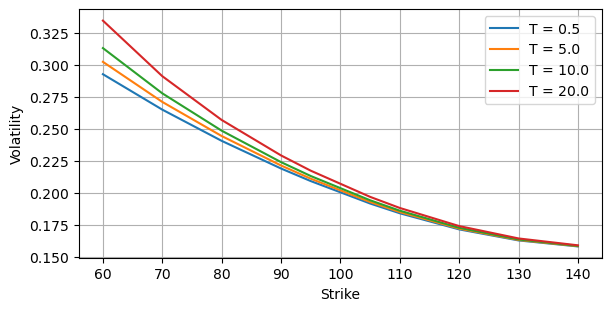

In [ ]:
# Sensitivity with respect to T
params = [0.5,5.0,10.0,20.0]
impvol_l = pd.DataFrame(0, index=strikes, columns=params)

for strike in strikes:
	for par in params:
		impvol_l.loc[strike, par] =LambdaSABR(strike, T=par, f0=f0, alpha=alpha,beta=beta,nu=nu,rho=rho,barlambda=barlambda,rlambda=0).imp_sigma()	

fig, axs = plt.subplots(1, 1, layout='constrained',figsize=(6, 3))
axs.plot(strikes_chart, impvol_l.iloc[:,0], strikes_chart, impvol_l.iloc[:,1], strikes_chart, impvol_l.iloc[:,2], strikes_chart, impvol_l.iloc[:,3])
axs.set_xlabel('Strike')
axs.set_ylabel('Volatility')
axs.grid(True)
axs.lines[0].set_label('T = 0.5')
axs.lines[1].set_label('T = 5.0')
axs.lines[2].set_label('T = 10.0')
axs.lines[3].set_label('T = 20.0')
axs.legend(loc="upper right")

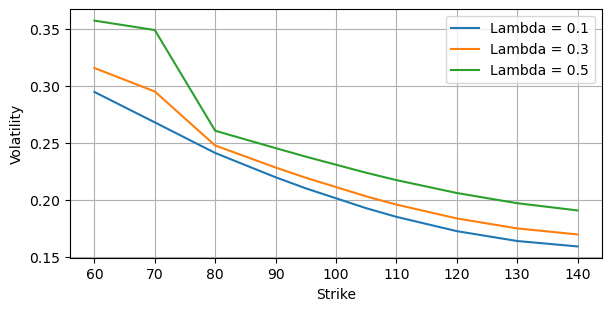

In [ ]:
# Sensitivity with respect to lambda
params = [0.1, 0.3, 0.5]

impvol_l = pd.DataFrame(0, index=strikes, columns=params)

for strike in strikes:
	for par in params:
		impvol_l.loc[strike, par] =LambdaSABR(strike, T=par, f0=f0, alpha=alpha,beta=beta,nu=nu,rho=rho,barlambda=barlambda,rlambda=par).imp_sigma()	

fig, axs = plt.subplots(1, 1, layout='constrained',figsize=(6, 3))
axs.plot(strikes_chart, impvol_l.iloc[:,0], strikes_chart, impvol_l.iloc[:,1], strikes_chart, impvol_l.iloc[:,2])
axs.set_xlabel('Strike')
axs.set_ylabel('Volatility')
axs.grid(True)
axs.lines[0].set_label('Lambda = 0.1')
axs.lines[1].set_label('Lambda = 0.3')
axs.lines[2].set_label('Lambda = 0.5')
axs.legend(loc="upper right")

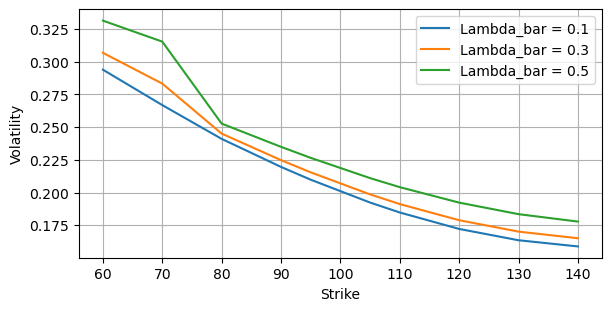

In [ ]:
# Sensitivity with respect to barlambda
params = [0.1, 0.3, 0.5]

impvol_l = pd.DataFrame(0, index=strikes, columns=params)

for strike in strikes:
	for par in params:
		impvol_l.loc[strike, par] =LambdaSABR(strike, T=par, f0=f0, alpha=alpha,beta=beta,nu=nu,rho=rho,barlambda=par,rlambda=rlambda).imp_sigma()	

fig, axs = plt.subplots(1, 1, layout='constrained',figsize=(6, 3))
axs.plot(strikes_chart, impvol_l.iloc[:,0], strikes_chart, impvol_l.iloc[:,1], strikes_chart, impvol_l.iloc[:,2])
axs.set_xlabel('Strike')
axs.set_ylabel('Volatility')
axs.grid(True)
axs.lines[0].set_label('Lambda_bar = 0.1')
axs.lines[1].set_label('Lambda_bar = 0.3')
axs.lines[2].set_label('Lambda_bar = 0.5')
axs.legend(loc="upper right")